### Part 1a

In [1]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
N = 10000      # Set value of N as 1
s = 1          # Set value of s as 1

x = [0] * N    # Create an empty array for x values 
x[0] = 1       # Set value of x_0 as 1

x_df = pd.DataFrame(x)                       # Convert x values to a data frame
x_df.rename(columns={0: 'x'}, inplace=True)  # Rename column name to 'x'

Assigned value of 1 to initial x, 10000 to N and 1 to s.

In [3]:
def func(x):
    return 0.5*np.exp(-abs(x))

Created a function with the given probability density function.

In [4]:
for i in range(1, N):
    x_star = np.random.normal(loc= x_df.at[i-1, 'x'], scale= s, size=1)
    r = func(x_star)/func(x_df.at[i-1, 'x'])
    u = np.random.uniform(0, 1, 1)  
    if (u < r):
        x_df.at[i, 'x'] = x_star
    else:
        x_df.at[i, 'x'] = x_df.at[i-1, 'x']

Implemented random walk Metropolis using given steps.

In [5]:
sample_mean = x_df['x'].mean() 
sample_mean

-0.10734536181940522

Used mean() from pandas to find the sample mean of x.

In [6]:
sample_sd = x_df['x'].std() 
sample_sd

1.3131180696833482

Used std() from pandas to find the sample standard deviation of x.

In [7]:
fx = np.random.normal(0, scale= sample_sd, size=10000)  # Use numpy random normal function to generate fx
fx_df = pd.DataFrame(fx)                                # Store fx values into a data frame

Generated fx values and stored them in a data frame.

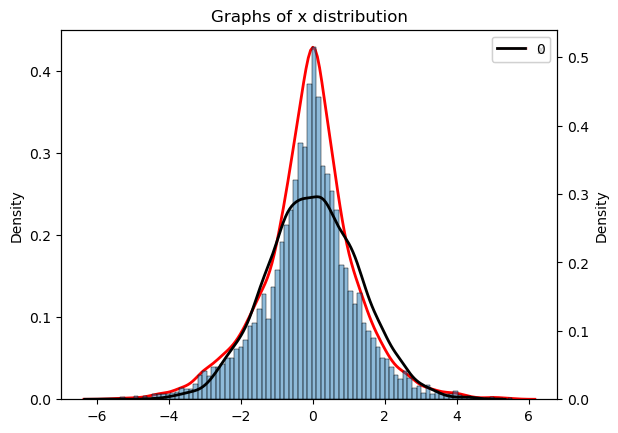

In [8]:
fig, ax1 = plt.subplots()

sns.kdeplot(data = x_df, palette = ['red'], lw = 2)
ax2 = ax1.twinx()
sns.histplot(data = x_df, stat = "density")
ax2.set_title("Graphs of x distribution")
sns.kdeplot(data = fx_df, palette = ['black'], lw = 2)

plt.show()

### Part 1b

In [9]:
def generate_rwm(N,s):
    x = [0] * N                     # Create an empty array for x values
    x[0] = np.random.normal(size=1)     # Assign first x value a random number that is range from 2 to 10
    for i in range(1, N):
        x_star = np.random.normal(loc= x[i-1], scale= s, size=1)
        r = func(x_star)/func(x[i-1])
        u = np.random.uniform(0, 1, 1)  
        if (u < r):
            x[i] = x_star
        else:
            x[i] = x[i-1] 
    return x

A function called 'generate_rwm' was created with parameter of N, s to generate 2000 x values.

In [10]:
j = 4
N = 2000
s = 0.001

Set j, N and s values to 4, 2000 and 0.001 respectively.

In [11]:
def rhat_calc(N, s, j):
    M_list = [0] * j              # Create an empty array to store each chain's M values
    V_list = [0] * j              # Create an empty array to store each chain's V values
    for i in range(0, j):
        chain = generate_rwm(N, s)
        M_list[i] = sum(chain)/N
        V_list[i] = sum([(k - M_list[i]) ** 2 for k in chain])/N
    W = sum(V_list)/j
    M = sum(M_list)/j
    B = sum([(h - M) ** 2 for h in M_list])/j
    Rhat = np.sqrt((B+W)/W)
    return(Rhat)

print(rhat_calc(N, s, j))

[21.80619327]


Another function called 'rhat_calc' was created with parameter of j, N, s to generate rhat values.

In [12]:
s_list = np.arange(0.001, 1.001, 0.001)             # Create an list of s values that range from 0.001 to 1

rhat = [rhat_calc(N, s, j) for s in s_list]

rhat_df = pd.DataFrame(rhat)                        # Store rhat values into a data frame
rhat_df.rename(columns={0: 'rhat'}, inplace=True)   # Change column name from 0 to 'x'

Applied 'rhat_calc' function based on each s value and generated 1000 rhat values.

In [13]:
s_df = pd.DataFrame(s_list)                       # Store s values into a data frame
s_df.rename(columns={0: 's'}, inplace=True)       # Change column name from 0 to 'x'
rhat_df = pd.concat([s_df, rhat_df], axis = 1)    # Use pandas concat function to merge 2 data frames together

Combined both data frames for easier plotting using seaborn.

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data= rhat_df, x= "s", y= "rhat", alpha = 0.7, color = 'Red').set_title("R hat over a grid of s values")

plt.show()